In [1]:
# Install dependencies
!pip install -U torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1
!pip install -U transformers==4.27.4 diffusers==0.13.1 accelerate==0.17.1
!pip install -U datasets==2.6.1 huggingface_hub==0.14.1 bitsandbytes==0.36.0.post2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 64.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.8 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 51.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00:00:0100:01m
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu121
    Uninstalling torchaudio-2.5.1+cu121:
      Successfully uninstalled torchaudio-2.5.1+cu121
  Attempting uninstall: torch

In [2]:
!pip install "jax[cuda12_pip]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 13.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.88 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
chex 0.1.88 requires jaxlib>=0.4.27, but you have jaxlib 0.4.23+cuda12.cudnn89 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible

In [3]:
# Import necessary libraries
import torch
import os
import zipfile
from datasets import load_dataset
from huggingface_hub import snapshot_download

In [4]:
!nvidia-smi

Tue Apr  1 14:46:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Set device to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [40]:
# %cd ..
# !rm -rf StoryGen

/kaggle/working


In [6]:
!git clone https://github.com/nguyenphamngocquy/StoryGen.git

Cloning into 'StoryGen'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 396 (delta 133), reused 126 (delta 86), pack-reused 211 (from 1)
Receiving objects: 100% (396/396), 17.88 MiB | 42.38 MiB/s, done.
Resolving deltas: 100% (203/203), done.


In [7]:
%cd StoryGen

/kaggle/working/StoryGen


In [48]:
# Load pre-trained Stable Diffusion model
# sd_model_path = snapshot_download('stable-diffusion-v1-5/stable-diffusion-v1-5')
# !rsync -av --ignore-existing ${sd_model_path}/ ./ckpt/stable-diffusion-v1-5/

Fetching 36 files:   0%|          | 0/36 [00:00<?, ?it/s]

sending incremental file list
rsync: [sender] change_dir "/kaggle/working/StoryGen/$/root/.cache/huggingface/hub/models--stable-diffusion-v1-5--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14" failed: No such file or directory (2)

sent 19 bytes  received 12 bytes  62.00 bytes/sec
total size is 0  speedup is 0.00
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1338) [sender=3.2.7]


In [8]:
from huggingface_hub import hf_hub_download

hf_hub_download(
    repo_id="stable-diffusion-v1-5/stable-diffusion-v1-5",
    filename="unet/diffusion_pytorch_model.bin",
    local_dir="./ckpt/stable-diffusion-v1-5/",
    local_dir_use_symlinks=False
)

'./ckpt/stable-diffusion-v1-5/unet/diffusion_pytorch_model.bin'

In [9]:
# Run data processing pipeline
# !python StoryGen/data_process/extract.py
# !python StoryGen/data_process/dup_remove.py
# !python StoryGen/data_process/yolov7/human_ocr_mask.py
# !python StoryGen/data_process/SDM/inpaint.py
# !python StoryGen/data_process/align.py

In [29]:
!git pull

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0 (from 0)
Unpacking objects: 100% (7/7), 638 bytes | 159.00 KiB/s, done.
From https://github.com/nguyenphamngocquy/StoryGen
   6e17ee4..d1dfdc1  master     -> origin/master
Updating 6e17ee4..d1dfdc1
Fast-forward
 .gitignore                 | 3 +--
 inference.py               | 3 +--
 model/pipeline.py          | 2 +-
 model/unet_2d_condition.py | 7 ++++---
 4 files changed, 7 insertions(+), 8 deletions(-)


In [10]:
# !rm -rf "./stage1_log/"

In [12]:
# Training Stage 1 (Style Transfer Pretraining)
# DATASET_PATH="/kaggle/input/storysalon/StorySalon"
!CUDA_VISIBLE_DEVICES=0 accelerate launch train_StorySalon_stage1.py \
    --pretrained_model_path "stable-diffusion-v1-5/stable-diffusion-v1-5" \
    --dataset_path "/kaggle/input/storysalon/StorySalon/" \
    --num_inference_steps 20 \
    --guidance_scale 7 \
    --gradient_accumulation_steps 10 \
    --train_batch_size 6 \
    --train_steps 5000 \
    --validation_steps 500 \
    --checkpointing_steps 5000 \
    --seed 6666 \
    --mixed_precision "fp16" \
    --learning_rate 1e-5

2025-04-01 16:27:20.043777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 16:27:20.067279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 16:27:20.073826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The config attributes {'center_input_sample': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
state_dict key down_blocks.0.attentions.0.transformer_blocks.0.attn3.to_q.weight is initialized with self attention.
state_dict key down_blocks.0.attentions.0.transformer_blocks.0.at

In [20]:
!zip -r checkpoint_5000.zip "/kaggle/working/StoryGen/stage2_log/_250401-173734"
# !rm -rf checkpoint_5000.zip

  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/ (stored 0%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/ (stored 0%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/tokenizer/ (stored 0%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/tokenizer/merges.txt (deflated 60%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/tokenizer/special_tokens_map.json (deflated 73%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/tokenizer/tokenizer_config.json (deflated 68%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/tokenizer/vocab.json (deflated 71%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/vae/ (stored 0%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpoint_5000/vae/config.json (deflated 56%)
  adding: kaggle/working/StoryGen/stage2_log/_250401-173734/checkpo

In [18]:
# Training Stage 2 (Visual-Language Context Module)
!CUDA_VISIBLE_DEVICES=0 accelerate launch train_StorySalon_stage2.py \
    --pretrained_model_path "./stage1_log/_250401-162722/checkpoint_5000" \
    --dataset_path "/kaggle/input/storysalon/StorySalon/" \
    --num_inference_steps 10 \
    --guidance_scale 7 \
    --gradient_accumulation_steps 10 \
    --train_batch_size 4 \
    --train_steps 5000 \
    --validation_steps 500 \
    --checkpointing_steps 5000 \
    --seed 6666 \
    --learning_rate 1e-5

2025-04-01 17:37:32.408837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 17:37:32.431013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 17:37:32.437751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The config attributes {'center_input_sample': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.

--- Parameters in Text Encoder ---
                                             Parameter name         Shape  Total parameters  Status
0              text_model.embeddings.token_emb

In [30]:
# Run inference: 2 objects
!CUDA_VISIBLE_DEVICES=0 accelerate launch inference.py \
    --pretrained_model_path "./stage2_log/_250401-173734/checkpoint_5000" \
    --prompt "The white cat is running after the black-haired man." \
    --ref_prompt "The black-haired man" "The white cat" \
    --ref_image "./data/ref_images/boy.jpg" "./data/ref_images/whitecat.jpg" \
    --logdir "./inference_StorySalon" \
    --num_inference_steps 40 \
    --guidance_scale 7 \
    --image_guidance_scale 5 \
    --num_sample_per_prompt 10 \
    --stage "auto-regressive" \
    --mixed_precision "fp16"

2025-04-01 19:51:52.500386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 19:51:52.522628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 19:51:52.529261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The config attributes {'center_input_sample': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
ref_images:  torch.Size([1, 2, 3, 256, 256])
sample_seeds:  [1292, 14866, 15460, 15716, 22698, 23237, 27525, 41536, 69064, 76003]

Text embeddings shape after encoding:  torch.Size([

In [36]:
!zip -r inference_StorySalon.zip "/kaggle/working/StoryGen/inference_StorySalon/_250401-195154"
# !rm -rf inference_StorySalon.zip

  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/ (stored 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/76003_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/22698_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/1292_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/23237_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/27525_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/15460_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/69064_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/14866_output.png (deflated 0%)
  adding: kaggle/working/StoryGen/inference_StorySalon/_250401-195154/41536_output.png (deflated 0%)
  adding:

The white cat is running after the black-haired man.


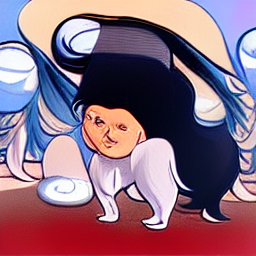

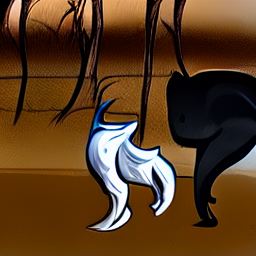

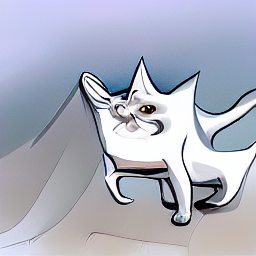

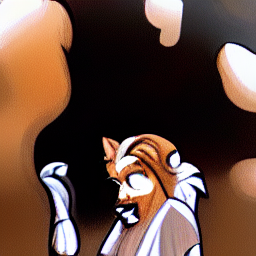

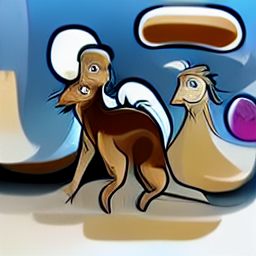

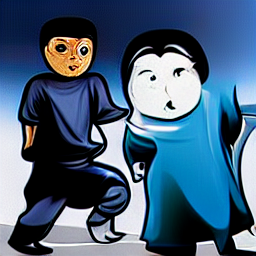

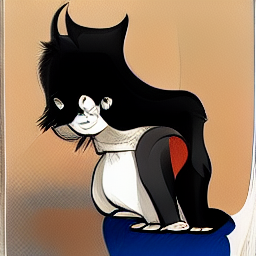

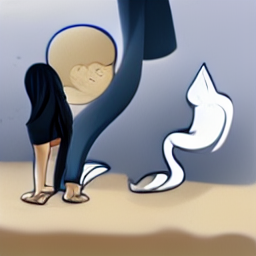

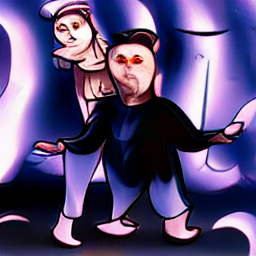

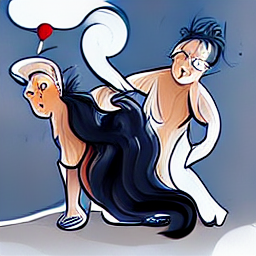

In [33]:
from IPython.display import display
from PIL import Image

# Get all image files in logdir
logdir="./inference_StorySalon/_250401-195154"
image_files = sorted([f for f in os.listdir(logdir) if f.endswith((".png", ".jpg", ".jpeg"))])

print("The white cat is running after the black-haired man.")

for image in image_files:
    image_path = os.path.join(logdir, image)
    display(Image.open(image_path))

In [35]:
# Run inference: 1 object
!CUDA_VISIBLE_DEVICES=0 accelerate launch inference.py \
    --pretrained_model_path "./stage2_log/_250401-173734/checkpoint_5000" \
    --prompt "The white cat is running by the river" \
    --ref_prompt "The white cat" \
    --ref_image "./data/ref_images/whitecat.jpg" \
    --logdir "./inference_StorySalon" \
    --num_inference_steps 40 \
    --guidance_scale 7 \
    --image_guidance_scale 5 \
    --num_sample_per_prompt 10 \
    --stage "auto-regressive" \
    --mixed_precision "fp16"

2025-04-01 20:00:33.757484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 20:00:33.779356: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 20:00:33.786054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The config attributes {'center_input_sample': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /kaggle/working/StoryGen/inference.py:178 in <module>                          

The white cat is running by the river


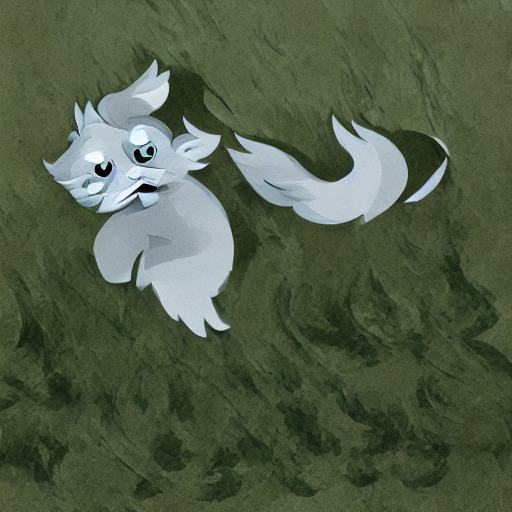

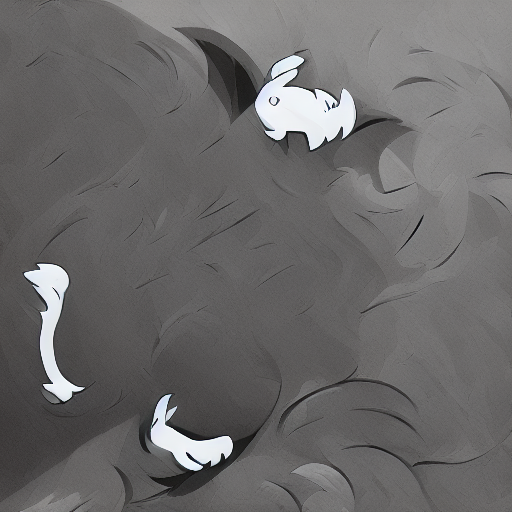

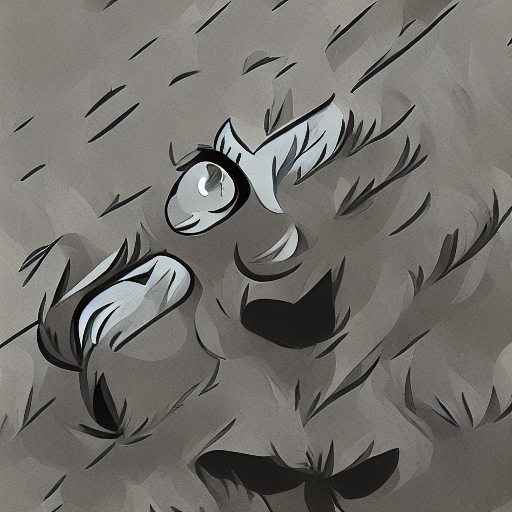

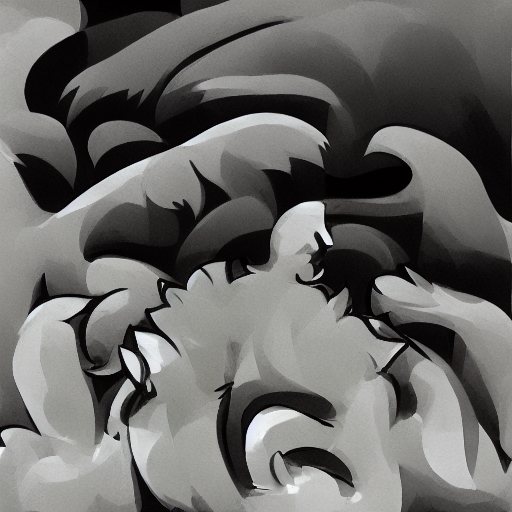

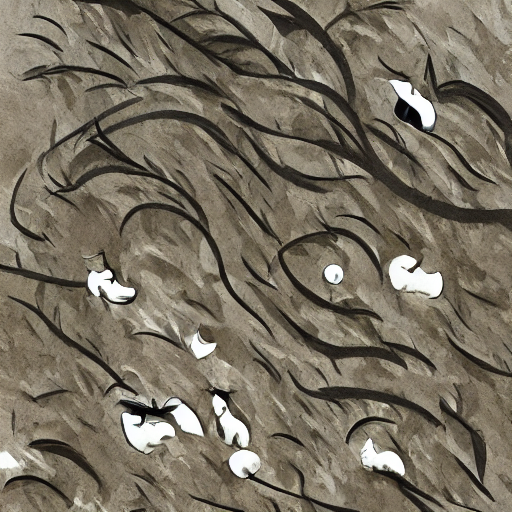

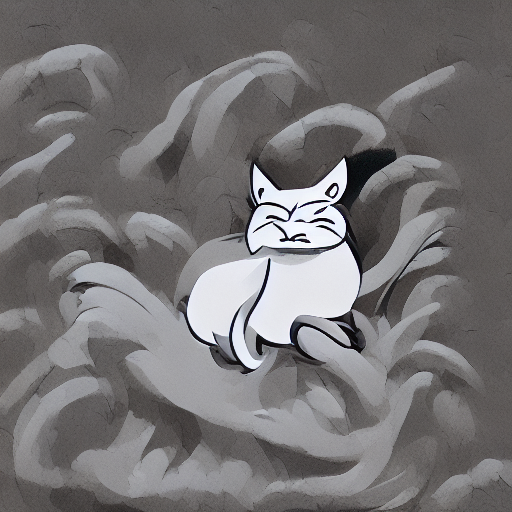

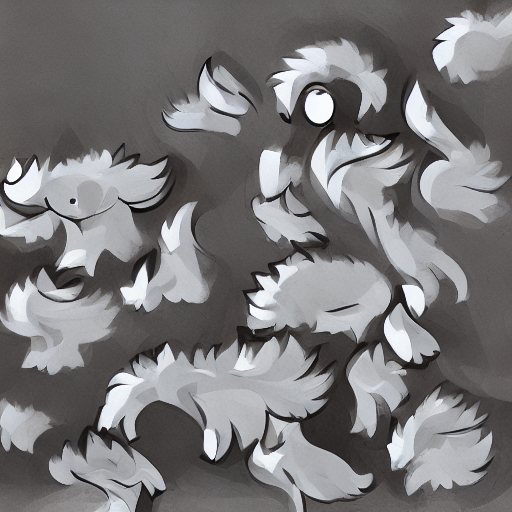

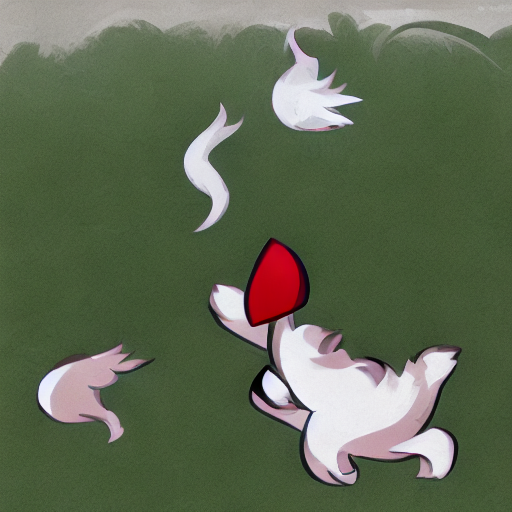

In [33]:
from IPython.display import display
from PIL import Image

# Get all image files in logdir
logdir="./inference_StorySalon_250307-100534/"
image_files = sorted([f for f in os.listdir(logdir) if f.endswith((".png", ".jpg", ".jpeg"))])

print("The white cat is running by the river")

for image in image_files:
    image_path = os.path.join(logdir, image)
    display(Image.open(image_path))